# Diabetes EDA
Import the necessary modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
# to display all figures the right size
sns.set(rc={'figure.figsize':(10, 6)})

## Initial observations
Load the dataset:

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<ul>
    <li><b>Pregnancies</b> - number of pregnancies.</li>
    <li><b>Glucose</b> - glucose level</li>
    <li><b>BloodPressure</b></li>
    <li><b>SkinThickness</b></li>
    <li><b>Insulin</b> - insulin level</li>
    <li><b>BMI</b> - Body Mass Index</li>
    <li><b>DiabetesPedigreeFunction</b> - measure of family history of diabetes</li>
    <li><b>Age</b></li>
    <li><b>Outcome</b> - 1 for diabetes, 0 for no diabetes</li>
</ul>
Examine the data:

In [3]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Zeroes in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' columns are probably missing values. Pregnancies and Outcome can contain zeroes. Convert the zeroes to NaN.

In [5]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[zero_cols] = diabetes_df[zero_cols].replace(0, np.nan)

## Missing Values
Check the missing values:

In [6]:
diabetes_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
total_cells = np.product(diabetes_df.shape)
missing_cells = diabetes_df.isna().sum().sum()
missing_percent = (missing_cells / total_cells) * 100
print(round(missing_percent,2), "%")

9.43 %


9.43% of the data is missing, mostly from the Insulin and SkinThickness columns. Displayed visually below:

<AxesSubplot: >

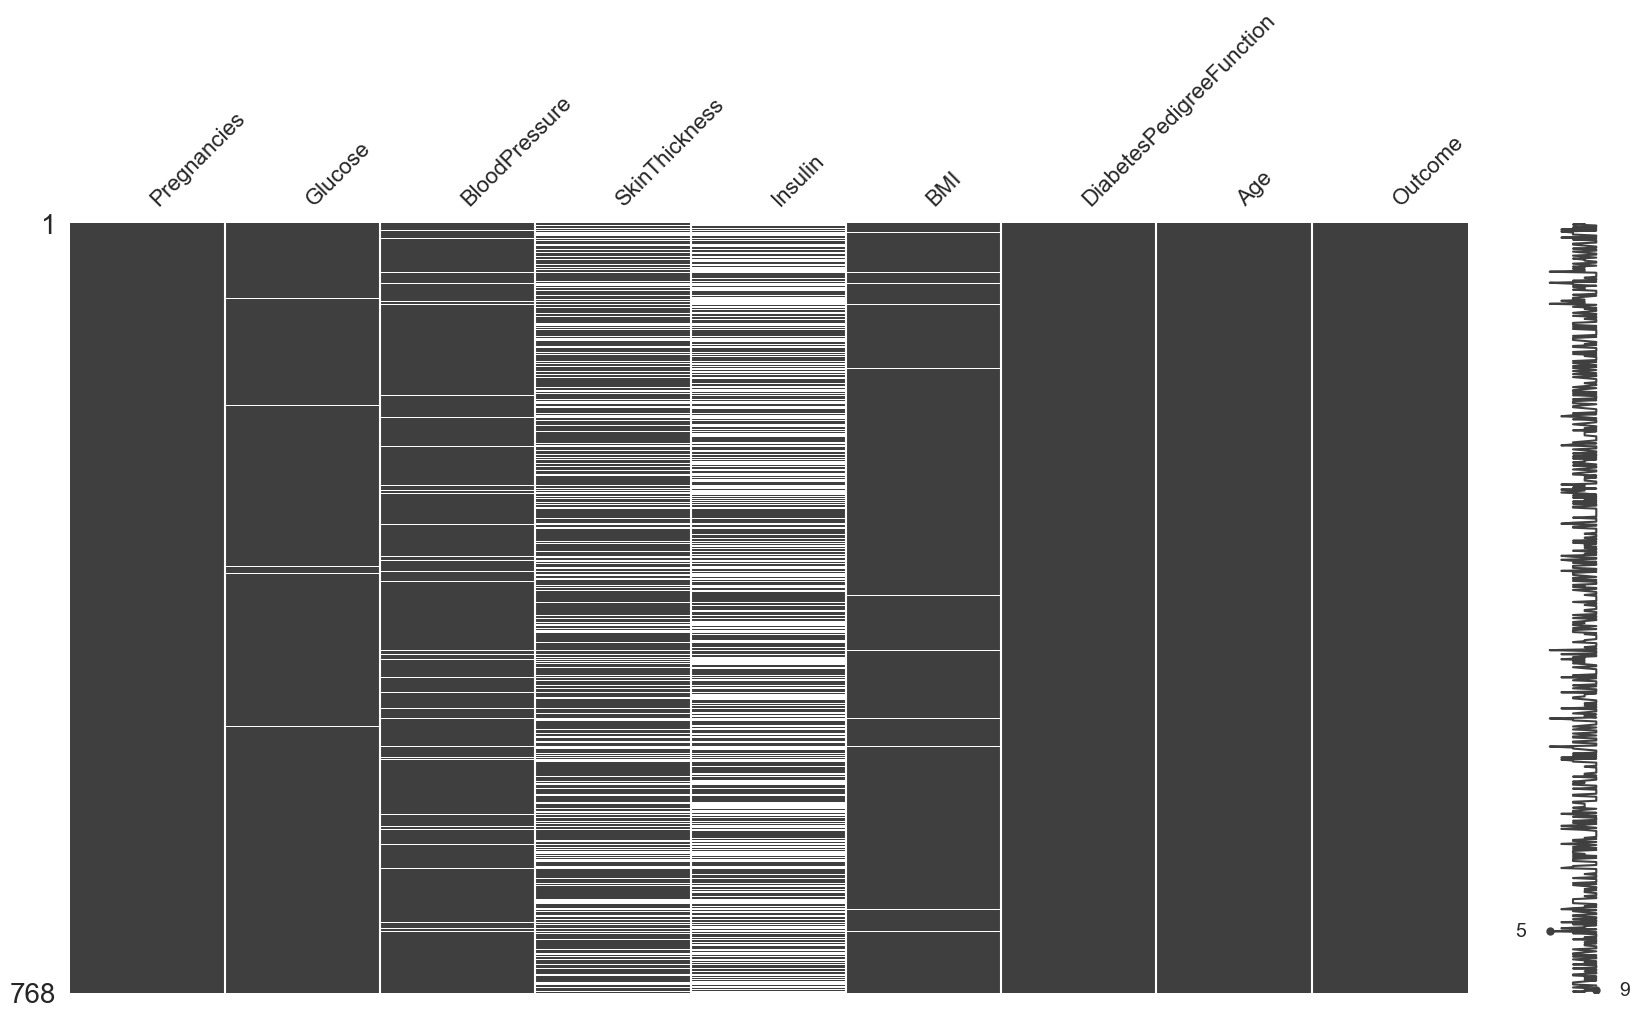

In [8]:
missingno.matrix(diabetes_df, figsize = (20,10))
#plt.savefig('fig1.png', dpi=300, bbox_inches='tight')

Some rows are missing a lot of data. It is maybe better to drop rows that have more than 3 (of 9) missing values. A lot of the data for those entries would be imputed.

In [9]:
diabetes_df = diabetes_df.dropna(axis=0, thresh=6)

In [10]:
diabetes_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
diabetes_df.shape

(761, 9)

Corresponds to only 7 entries, so not much data is lost.

### Glucose
There are five missing values in the 'Glucose' column.

In [12]:
diabetes_df[diabetes_df['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


Text(0.5, 1.0, 'Plasma glucose distribution')

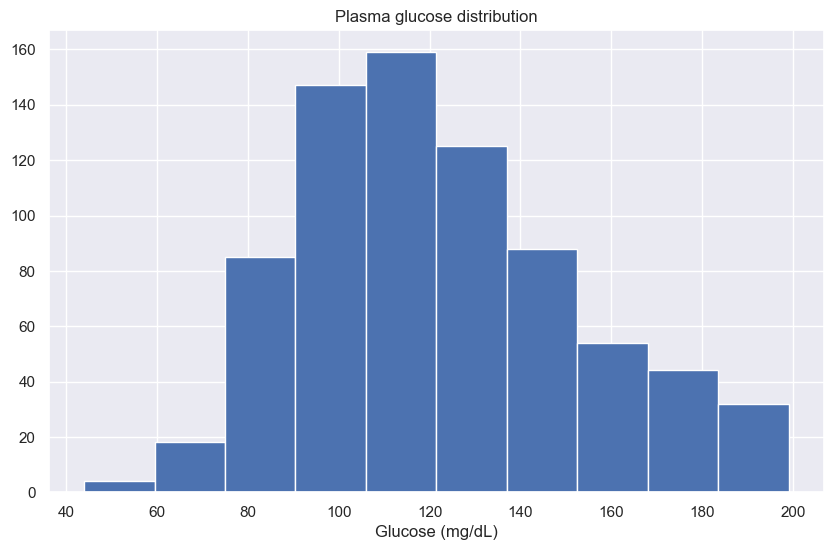

In [13]:
plt.hist(diabetes_df['Glucose'])
plt.xlabel("Glucose (mg/dL)")
plt.title("Plasma glucose distribution")

In [14]:
diabetes_df['Glucose'].describe()

count    756.000000
mean     121.932540
std       30.533481
min       44.000000
25%      100.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

The distribution of glucose has no serious outliers. It is possible to impute the mean for the five missing values. The original column contained integers, so cast it as an integer:

In [15]:
glucose_mean = int(diabetes_df['Glucose'].mean())
diabetes_df['Glucose'] = diabetes_df['Glucose'].replace(np.nan, glucose_mean)
diabetes_df['Glucose'] = diabetes_df['Glucose'].apply(np.int64)

### BloodPressure
There are 28 missing values for blood pressure.

In [16]:
diabetes_df[diabetes_df['BloodPressure'].isna()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100,NaN,NaN,NaN,30.0,0.484,32,1
78,0,131,NaN,NaN,NaN,43.2,0.270,26,1
172,2,87,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135,NaN,NaN,NaN,52.3,0.578,40,1


Text(0.5, 1.0, 'Blood pressure distribution')

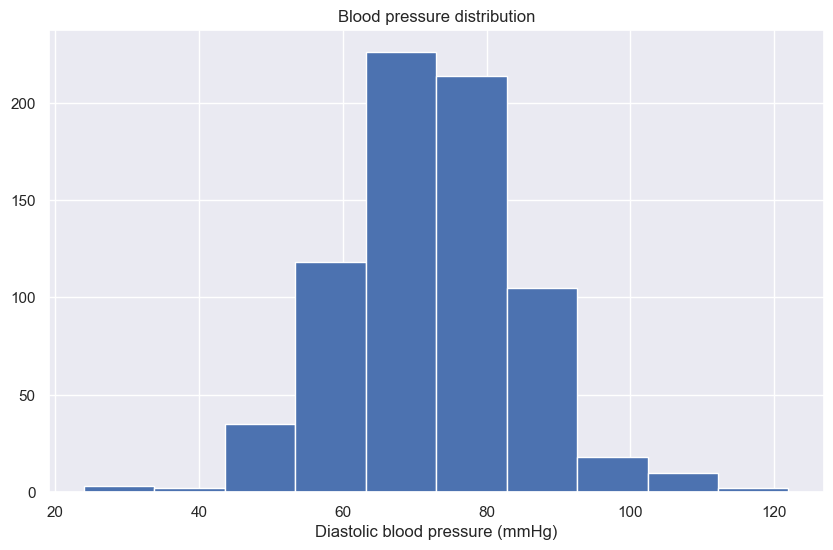

In [17]:
plt.hist(diabetes_df['BloodPressure'])
plt.xlabel("Diastolic blood pressure (mmHg)")
plt.title("Blood pressure distribution")

In [18]:
diabetes_df['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Similar results to Glucose, so follow the same procedure:

In [19]:
blood_pressure_mean = int(diabetes_df['BloodPressure'].mean())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].replace(np.nan, blood_pressure_mean)
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].apply(np.int64)

### BMI
BMI has four values missing. 

In [20]:
diabetes_df[diabetes_df['BMI'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,NaN,NaN,NaN,0.232,54,1
145,0,102,75,23.0,NaN,NaN,0.572,21,0
371,0,118,64,23.0,89.0,NaN,1.731,21,0
684,5,136,82,NaN,NaN,NaN,0.640,69,0


Text(0.5, 1.0, 'Body mass index distribution')

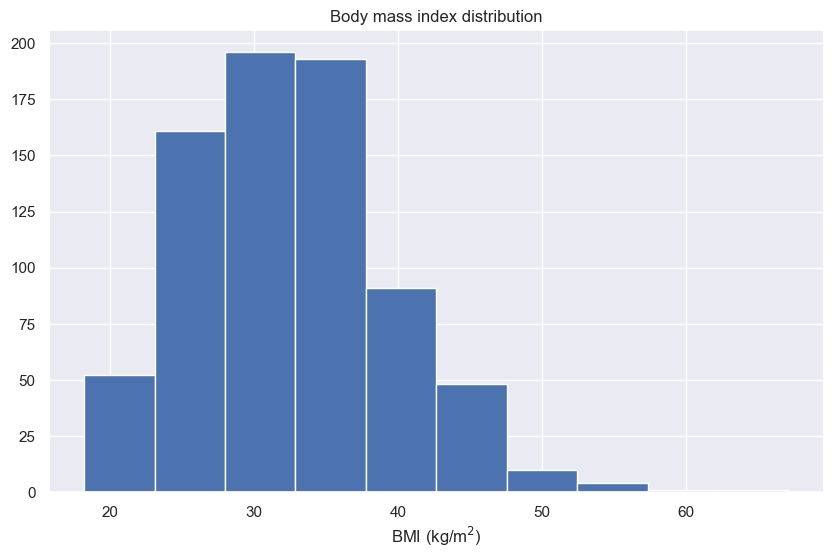

In [21]:
plt.hist(diabetes_df['BMI'])
plt.xlabel('BMI (kg/m$^2$)')
plt.title('Body mass index distribution')

In [22]:
diabetes_df['BMI'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Some higher values are skewing the mean a little, but it does not change the distribution too much. The same procedure for BMI:

In [23]:
bmi_mean = diabetes_df['BMI'].mean()
diabetes_df['BMI'] = diabetes_df['BMI'].replace(np.nan, bmi_mean)

### SkinThickness and Insulin
A lot more values are missing for these columns (220 and 327 respectively).

Text(0.5, 1.0, 'Skin thickness distribution')

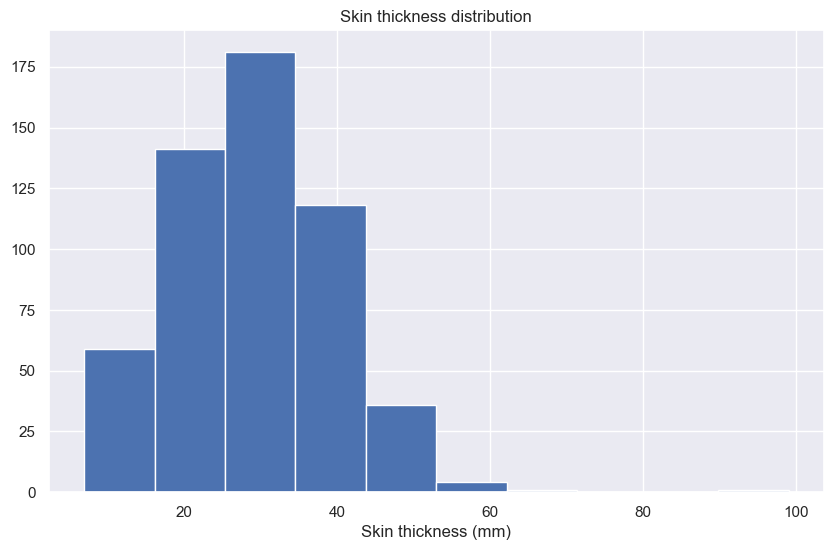

In [24]:
plt.hist(diabetes_df['SkinThickness'])
plt.xlabel("Skin thickness (mm)")
plt.title("Skin thickness distribution")

Text(0.5, 1.0, 'Insulin levels distribution')

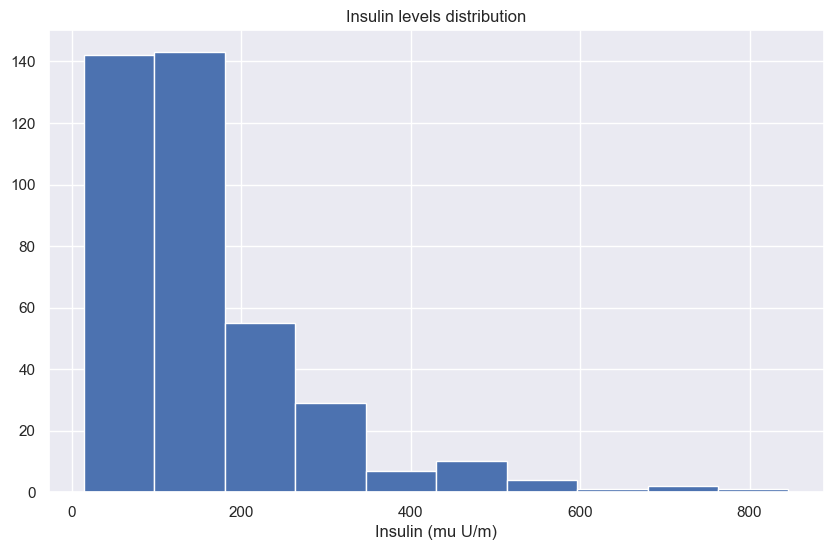

In [25]:
plt.hist(diabetes_df['Insulin'])
plt.xlabel("Insulin (mu U/m)")
plt.title("Insulin levels distribution")

In [26]:
diabetes_df['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [27]:
diabetes_df['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

Skin thickness is relatively normal, so the mean can be substitued for the missing values. On the other hand, insulin is very skewed by much larger values, so the median is better.

In [28]:
skin_thickness_mean = int(diabetes_df['SkinThickness'].mean())
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(np.nan, skin_thickness_mean)
# cast to int as it was originally
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].apply(np.int64)

In [29]:
insulin_median = int(diabetes_df['Insulin'].median())
diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(np.nan, insulin_median)
# cast to int as it was originally
diabetes_df['Insulin'] = diabetes_df['Insulin'].apply(np.int64)

## Organising data
This dataset has mostly discrete data. It is possible to derive some categorical data from discrete columns.
### BMI
BMI can classify people as underweight (below 18.5), normal weight (18.5 to 24.9), overweight (25 to 29.9) and obese (over 30)

In [30]:
diabetes_df[['BMI']].describe()

,BMI
count,761.000000
mean,32.457464
std,6.906741
min,18.200000
25%,27.500000
50%,32.400000
75%,36.600000
max,67.100000


In the dataset, there are not many underweight individuals, but a lot of obese individuals, so a change of boundaries is appropriate.

In [31]:
diabetes_df['BMI_classification'] = pd.cut(diabetes_df['BMI'],
                                           bins=[0, 24.9, 29.9, 34.9, 68],
                                          labels=['normal', 'overweight', 'obese', 'obese+'])

In [32]:
diabetes_df['BMI_classification'].value_counts()

obese+        248
obese         228
overweight    179
normal        106
Name: BMI_classification, dtype: int64

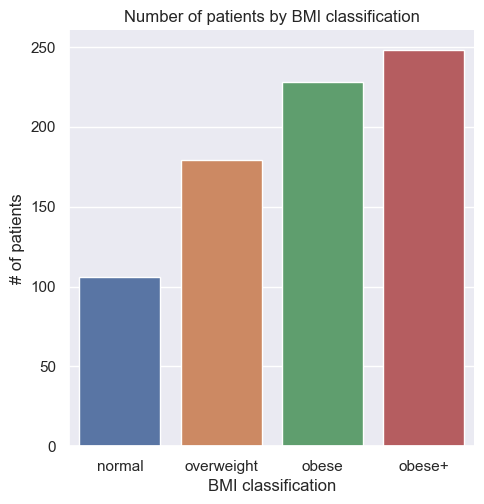

In [33]:
sns.catplot(kind='count',
            data=diabetes_df,
            x='BMI_classification').set(title='Number of patients by BMI classification',
                                ylabel='# of patients',
                                xlabel='BMI classification')
#plt.savefig('fig2.png', dpi=300, bbox_inches='tight')

The majority of patients are obese. A smaller portion are normal or overweight.

### Blood pressure

In [34]:
diabetes_df[['BloodPressure']].describe()

,BloodPressure
count,761.000000
mean,72.390276
std,12.152165
min,24.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,122.000000


In [35]:
diabetes_df['BloodPressure_cat'] = pd.cut(diabetes_df['BloodPressure'],
                                         bins=[0, 79.9, 89, 123],
                                         labels=['optimal', 'normal', 'hypertension'])

In [36]:
diabetes_df[['BloodPressure_cat']].value_counts()

BloodPressure_cat
optimal              556
normal               145
hypertension          60
dtype: int64

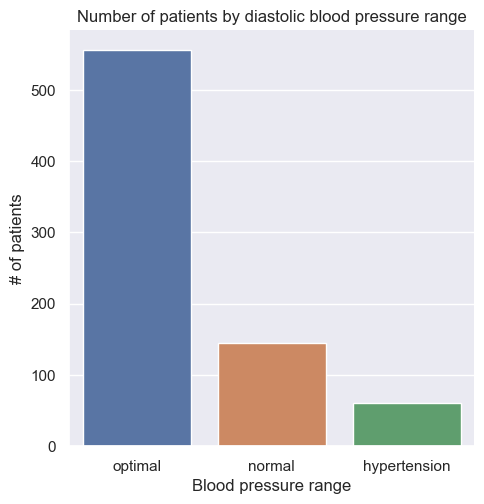

In [37]:
sns.catplot(kind='count',
            data=diabetes_df,
            x='BloodPressure_cat').set(title='Number of patients by diastolic blood pressure range',
                                ylabel='# of patients',
                                xlabel='Blood pressure range')
#plt.savefig('fig3.png', dpi=300, bbox_inches='tight')

The count plot shows that the majority of patients have optimal blood pressure. A small amount fall within the range of hypertension.

### Glucose

In [38]:
diabetes_df[['Glucose']].describe()

,Glucose
count,761.000000
mean,121.926413
std,30.432969
min,44.000000
25%,100.000000
50%,118.000000
75%,141.000000
max,199.000000


In [39]:
diabetes_df['Glucose_cat'] = pd.cut(diabetes_df['Glucose'],
                                         bins=[0, 110, 200],
                                         labels=['normal', 'high'])

In [40]:
diabetes_df[['Glucose_cat']].value_counts()

Glucose_cat
high           451
normal         310
dtype: int64

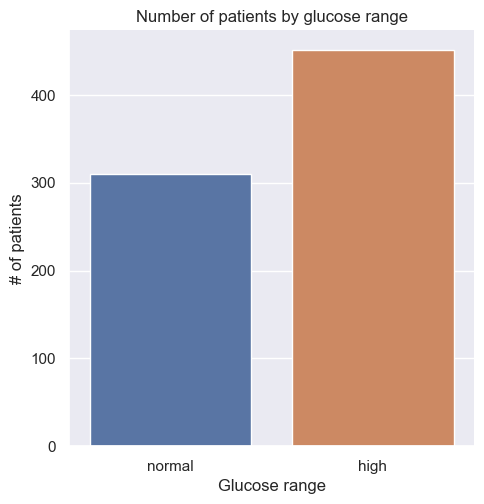

In [41]:
sns.catplot(kind='count',
            data=diabetes_df,
            x='Glucose_cat').set(title='Number of patients by glucose range',
                                ylabel='# of patients',
                                xlabel='Glucose range')
#plt.savefig('fig4.png', dpi=300, bbox_inches='tight')

The majority of patients have high plasma glucose level.

### Age

In [42]:
diabetes_df[['Age']].describe()

,Age
count,761.000000
mean,33.323259
std,11.779469
min,21.000000
25%,24.000000
50%,29.000000
75%,41.000000
max,81.000000


In [43]:
diabetes_df['Age_range'] = pd.cut(diabetes_df['Age'],
                                         bins=[18, 24, 34, 44, 100],
                                         labels=['18-24', '25-34', '35-44', '45+'])

In [44]:
diabetes_df['Age_range'].value_counts()

25-34    266
18-24    215
35-44    147
45+      133
Name: Age_range, dtype: int64

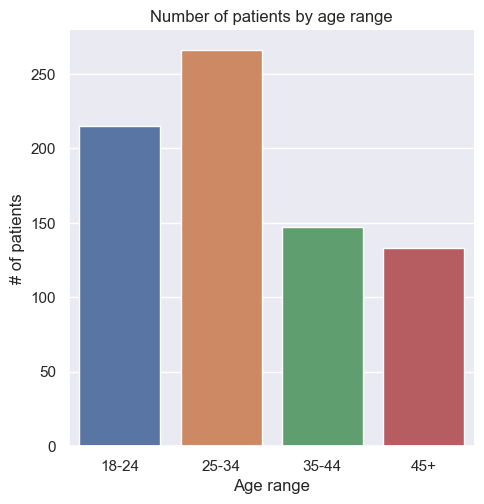

In [45]:
sns.catplot(kind='count',
            data=diabetes_df,
            x='Age_range').set(title='Number of patients by age range',
                                ylabel='# of patients',
                                xlabel='Age range')
#plt.savefig('fig5.png', dpi=300, bbox_inches='tight')

The biggest age group is 25 to 34, the next biggest is 18-24, and the smallest group is 45 and over. In general, the dataset contains younger patients.

## Data Exploration
First, compare the diabetics with the non-diabetics. There are approximately twice as many non-diabetics (494 vs 267). In the dataset, the rate of diabetes is 35.1% compared to 11.3% for the US in general.

In [46]:
diabetes_df['Outcome'].value_counts()

0    494
1    267
Name: Outcome, dtype: int64

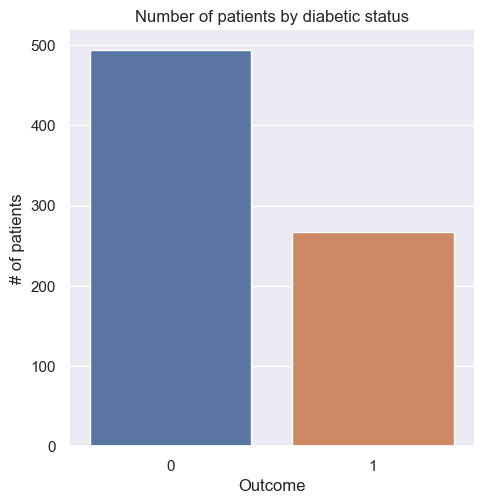

In [47]:
sns.catplot(kind='count',
            data=diabetes_df,
            x='Outcome').set(title="Number of patients by diabetic status",
                            ylabel="# of patients")
#plt.savefig('fig6.png', dpi=300, bbox_inches='tight')

What are the characteristics of diabetics vs. non-diabetics?

In [48]:
positive_df = diabetes_df[diabetes_df['Outcome'] == 1]
positive_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_classification,BloodPressure_cat,Glucose_cat,Age_range
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267,267,267,267
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,obese+,optimal,high,25-34
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,177,225,94
mean,4.846442,142.262172,75.134831,31.696629,164.850187,35.395721,0.551584,37.093633,1.0,NaN,NaN,NaN,NaN
std,3.734972,29.553803,11.972579,8.677693,101.092380,6.605003,0.372630,10.980273,0.0,NaN,NaN,NaN,NaN
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0,NaN,NaN,NaN,NaN
25%,1.500000,119.500000,68.000000,29.000000,125.000000,30.900000,0.263500,28.000000,1.0,NaN,NaN,NaN,NaN
50%,4.000000,140.000000,74.000000,29.000000,125.000000,34.300000,0.451000,36.000000,1.0,NaN,NaN,NaN,NaN
75%,8.000000,167.000000,82.000000,36.000000,167.500000,38.850000,0.729000,44.000000,1.0,NaN,NaN,NaN,NaN


In [49]:
negative_df = diabetes_df[diabetes_df['Outcome'] == 0]
negative_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_classification,BloodPressure_cat,Glucose_cat,Age_range
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0,494,494,494,494
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overweight,optimal,normal,18-24
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,379,268,184
mean,3.297571,110.935223,70.906883,27.710526,127.825911,30.869377,0.432261,31.285425,0.0,NaN,NaN,NaN,NaN
std,3.023658,24.728133,12.001159,8.603693,74.898485,6.541925,0.299902,11.704332,0.0,NaN,NaN,NaN,NaN
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0,NaN,NaN,NaN,NaN
25%,1.000000,94.000000,62.000000,22.000000,94.250000,25.600000,0.231000,23.000000,0.0,NaN,NaN,NaN,NaN
50%,2.000000,108.000000,71.000000,29.000000,125.000000,30.150000,0.339000,27.000000,0.0,NaN,NaN,NaN,NaN
75%,5.000000,125.000000,78.000000,31.000000,125.000000,35.300000,0.569250,37.000000,0.0,NaN,NaN,NaN,NaN


### Number of pregnancies and diabetic status
Does the number of pregnancies influence if a patient is diabetic?

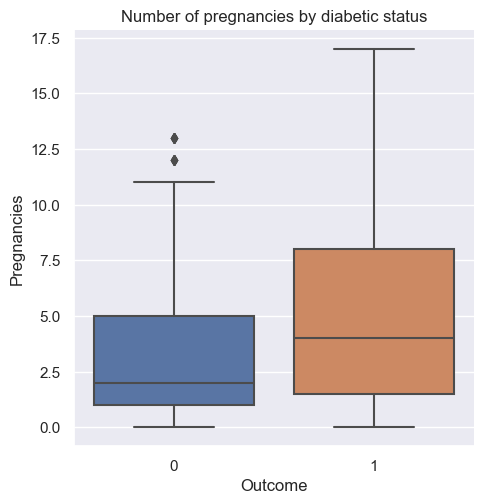

In [50]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='Outcome',
            y='Pregnancies').set(title='Number of pregnancies by diabetic status')
#plt.savefig('fig7.png', dpi=300, bbox_inches='tight')

In [51]:
positive_df['Pregnancies'].describe()

count    267.000000
mean       4.846442
std        3.734972
min        0.000000
25%        1.500000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [52]:
negative_df['Pregnancies'].describe()

count    494.000000
mean       3.297571
std        3.023658
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [53]:
stats.ttest_ind(positive_df['Pregnancies'], negative_df['Pregnancies'], equal_var=False)

Ttest_indResult(statistic=5.822891450447076, pvalue=1.0913212842680334e-08)

<Figure size 1000x600 with 0 Axes>

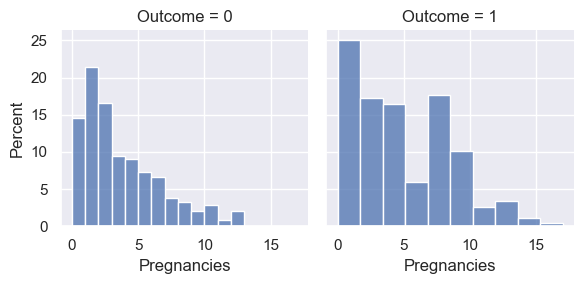

In [54]:
plt.figure()
fig = sns.FacetGrid(diabetes_df, col='Outcome', margin_titles=True)
fig.map(sns.histplot, 'Pregnancies', stat='percent')
#plt.savefig('fig8.png', dpi=300, bbox_inches='tight')

The boxplot shows that patients who are not diabetic tend to have had fewer pregnancies. Neither group is normally distributed. The distribution for both groups is skewed to the right, but the skewness is more extreme for non-diabetics.
### Glucose level and diabetes
It is expected that untreated diabetics would have higher glucose levels.

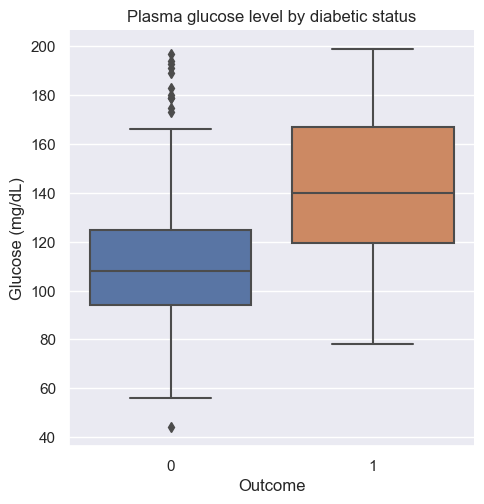

In [55]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='Outcome',
            y='Glucose').set(title='Plasma glucose level by diabetic status',
                            ylabel='Glucose (mg/dL)')
#plt.savefig('fig9.png', dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

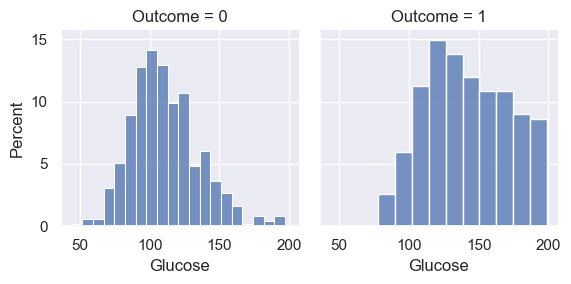

In [56]:
plt.figure()
fig = sns.FacetGrid(diabetes_df, col='Outcome', margin_titles=True)
fig.map(sns.histplot, 'Glucose', stat='percent')

In [57]:
positive_df['Glucose'].describe()

count    267.000000
mean     142.262172
std       29.553803
min       78.000000
25%      119.500000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

In [58]:
negative_df['Glucose'].describe()

count    494.000000
mean     110.935223
std       24.728133
min       44.000000
25%       94.000000
50%      108.000000
75%      125.000000
max      197.000000
Name: Glucose, dtype: float64

In [59]:
stats.ttest_ind(positive_df['Glucose'], negative_df['Glucose'], equal_var=False)

Ttest_indResult(statistic=14.752792443756162, pvalue=9.72562624186504e-41)

The box plot shows that non-diabetics have lower amounts of glucose.

[Text(0.5, 1.0, 'Glucose category and diabetic outcome'),
 Text(92.25, 0.5, 'Glucose level')]

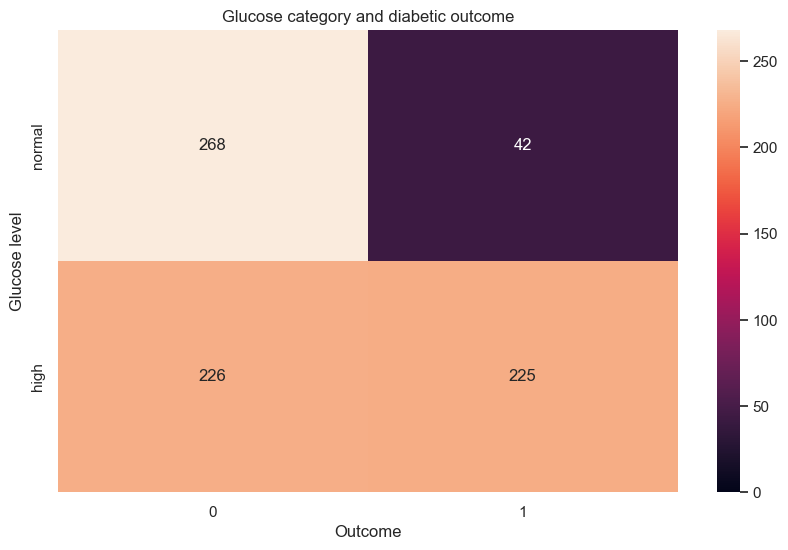

In [91]:
diabetes_glucose = pd.pivot_table(diabetes_df, index='Glucose_cat',
                                  columns='Outcome',
                                  aggfunc='size')
sns.heatmap(diabetes_glucose, annot=True, fmt='', vmin=0).set(title='Glucose category and diabetic outcome',
                                                     ylabel='Glucose level')
#plt.savefig('fig10.png', dpi=300, bbox_inches='tight')

Only about half of the patients with high blood sugar did. Diabetics are mostly likely to have high blood sugar.

In [73]:
diabetes_df.groupby('Glucose_cat')[['Outcome']].agg(['mean', 'sum', 'size'])

Outcome          
                 mean  sum size
Glucose_cat                    
normal       0.135484   42  310
high         0.498891  225  451

Patients with high glucose were 1.42 times as likely to have diabetes.
### Blood pressure and diabetes
Is there a connection between blood pressure and diabetes?

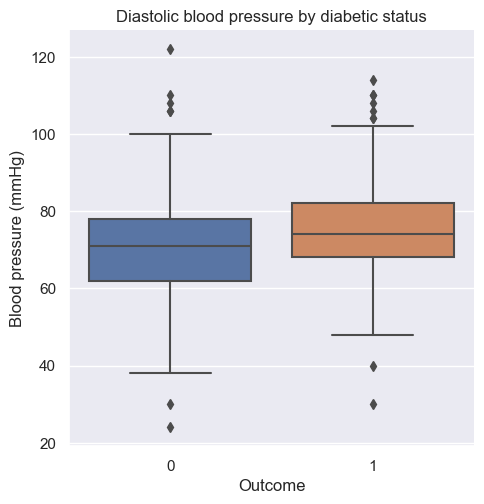

In [62]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='Outcome',
            y='BloodPressure').set(title='Diastolic blood pressure by diabetic status',
                            ylabel='Blood pressure (mmHg)')
#plt.savefig('fig11.png', dpi=300, bbox_inches='tight')

The boxplot shows that diabetics tend to have higher blood pressure than non-diabetics.

In [63]:
positive_df['BloodPressure'].describe()

count    267.000000
mean      75.134831
std       11.972579
min       30.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

In [64]:
negative_df['BloodPressure'].describe()

count    494.000000
mean      70.906883
std       12.001159
min       24.000000
25%       62.000000
50%       71.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [74]:
diabetes_df.groupby('BloodPressure_cat')[['Outcome']].agg(['mean', 'sum', 'size'])

Outcome          
                       mean  sum size
BloodPressure_cat                    
optimal            0.318345  177  556
normal             0.420690   61  145
hypertension       0.483333   29   60

Both patients with normal blood pressure and those with hypertension have an increased risk of diabetes. 1.20 and 1.38 times respectively.
### Diabetes and BMI
Is there a connection between BMI and diabetes?

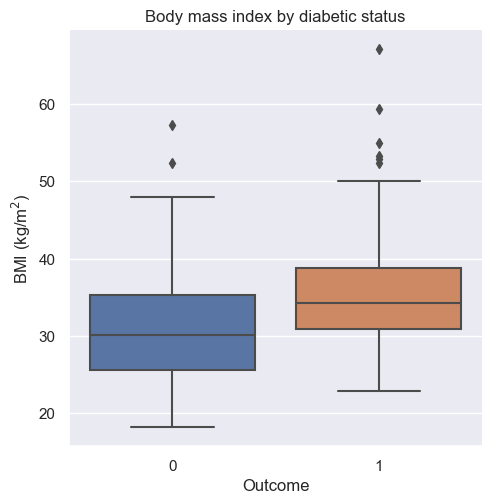

In [66]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='Outcome',
            y='BMI').set(title='Body mass index by diabetic status',
                            ylabel='BMI (kg/m$^2$)')
#plt.savefig('fig12.png', dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

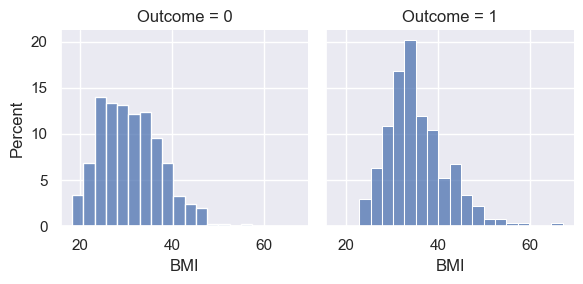

In [67]:
plt.figure()
fig = sns.FacetGrid(diabetes_df, col='Outcome', margin_titles=True)
fig.map(sns.histplot, 'BMI', stat='percent')
#plt.savefig('fig13.png', dpi=300, bbox_inches='tight')

In [87]:
stats.ttest_ind(positive_df['BMI'], negative_df['BMI'], equal_var=False)

Ttest_indResult(statistic=9.052204226609913, pvalue=2.5267842591688936e-18)

In [69]:
positive_df['BMI'].describe()

count    267.000000
mean      35.395721
std        6.605003
min       22.900000
25%       30.900000
50%       34.300000
75%       38.850000
max       67.100000
Name: BMI, dtype: float64

In [70]:
negative_df['BMI'].describe()

count    494.000000
mean      30.869377
std        6.541925
min       18.200000
25%       25.600000
50%       30.150000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

The boxplot shows that diabetics tended to have higher BMIs.

In [72]:
diabetes_df.groupby('BMI_classification')[['Outcome']].agg(['mean', 'sum', 'size'])

Outcome          
                        mean  sum size
BMI_classification                    
normal              0.066038    7  106
overweight          0.223464   40  179
obese               0.447368  102  228
obese+              0.475806  118  248

In [144]:
bmi_range_1 = diabetes_df[diabetes_df['BMI_classification'] == 'normal']
bmi_range_2 = diabetes_df[diabetes_df['BMI_classification'] == 'overweight']
bmi_range_3 = diabetes_df[diabetes_df['BMI_classification'] == 'obese']
bmi_range_4 = diabetes_df[diabetes_df['BMI_classification'] == 'obese+']

In [145]:
stats.ttest_ind(bmi_range_1['Outcome'], bmi_range_2['Outcome'])

Ttest_indResult(statistic=-3.5240115827604943, pvalue=0.000495501412999636)

In [146]:
stats.ttest_ind(bmi_range_2['Outcome'], bmi_range_3['Outcome'])

Ttest_indResult(statistic=-4.82566974309261, pvalue=1.979954601169494e-06)

In [153]:
stats.ttest_ind(bmi_range_3['Outcome'], bmi_range_4['Outcome'])

Ttest_indResult(statistic=-0.6206217763194112, pvalue=0.5351467946705939)

Obese patients had an increase risk of diabetes. 1.32 times.
### Diabetes and age

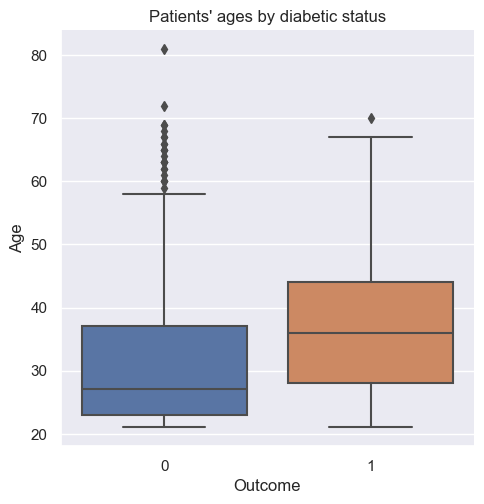

In [81]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='Outcome',
            y='Age').set(title="Patients' ages by diabetic status",
                            ylabel='Age')
#plt.savefig('fig14.png', dpi=300, bbox_inches='tight')

In [84]:
positive_df['Age'].describe()

count    267.000000
mean      37.093633
std       10.980273
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64

In [85]:
negative_df['Age'].describe()

count    494.000000
mean      31.285425
std       11.704332
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64

<Figure size 1000x600 with 0 Axes>

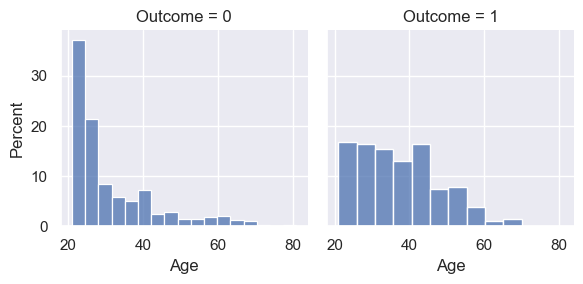

In [83]:
plt.figure()
fig = sns.FacetGrid(diabetes_df, col='Outcome', margin_titles=True)
fig.map(sns.histplot, 'Age', stat='percent')
#plt.savefig('fig15.png', dpi=300, bbox_inches='tight')

Diabetics are more likely to be older than non-diabetics. The majority of non-diabetics are younger, among diabetes, the age distribution is more even. This is similar to the distributions for pregnancies. However, some of the oldest people in the dataset are non-diabetics. This difference is statistically significant.

In [90]:
stats.ttest_ind(positive_df['Age'], negative_df['Age'], equal_var=False)

Ttest_indResult(statistic=6.803260636254235, pvalue=2.569788309426115e-11)

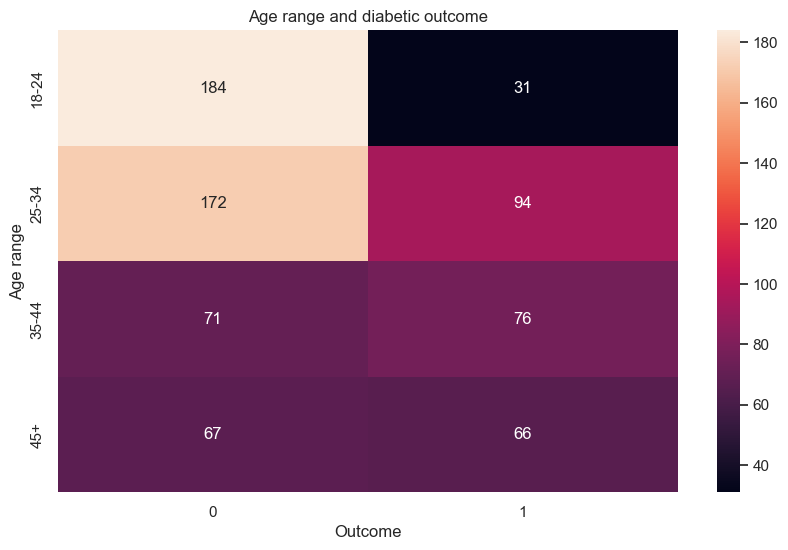

In [82]:
diabetes_age = pd.pivot_table(diabetes_df, index='Age_range',
                                  columns='Outcome',
                                  aggfunc='size')
sns.heatmap(diabetes_age, annot=True, fmt='').set(title='Age range and diabetic outcome',
                                                     ylabel='Age range')


The majority of 18-24 year olds are non-diabetic. The proportion of diabetics increases with age and peaks at 35-44. It remains steady for 45+. 

In [86]:
diabetes_df.groupby('Age_range')[['Outcome']].agg(['mean', 'sum', 'size'])

Outcome         
               mean sum size
Age_range                   
18-24      0.144186  31  215
25-34      0.353383  94  266
35-44      0.517007  76  147
45+        0.496241  66  133

Patients in the 35-44 and 45+ age groups have increased risk of diabetes. 1.47 and 1.41 times respectively. Age seems to be the biggest indicator of wherever a patient will be diabetic.

In [126]:
age_range_1 = diabetes_df[diabetes_df['Age_range'] == '18-24']
age_range_2 = diabetes_df[diabetes_df['Age_range'] == '25-34']
age_range_3 = diabetes_df[diabetes_df['Age_range'] == '35-44']
age_range_4 = diabetes_df[diabetes_df['Age_range'] == '45+']

In [127]:
stats.ttest_ind(age_range_1['Outcome'], age_range_2['Outcome'])

Ttest_indResult(statistic=-5.342864253879467, pvalue=1.4172485387066943e-07)

In [128]:
stats.ttest_ind(age_range_2['Outcome'], age_range_3['Outcome'])

Ttest_indResult(statistic=-3.268976902644089, pvalue=0.0011701770753497396)

In [129]:
stats.ttest_ind(age_range_3['Outcome'], age_range_4['Outcome'])

Ttest_indResult(statistic=0.3459184090501043, pvalue=0.7296656682026563)

Statistically, the outcome for patients between 35-44 and 45+ is the same. It is possible to reanalyse with different groupings. Combining the two older groups into a 35+ group:

In [94]:
diabetes_df['Age_range_new'] = pd.cut(diabetes_df['Age'],
                                         bins=[18, 24, 34,100],
                                         labels=['18-24', '25-34', '35+'])

[Text(0.5, 1.0, 'Age range and diabetic outcome'),
 Text(92.25, 0.5, 'Age range')]

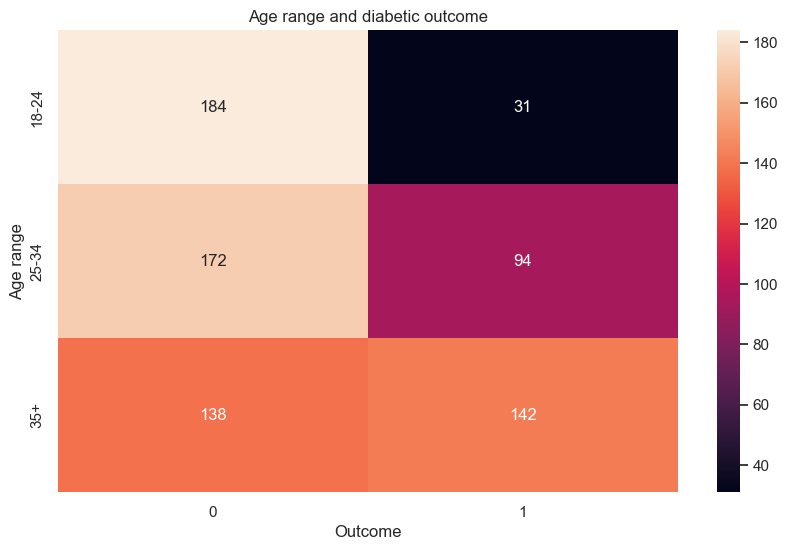

In [95]:
diabetes_age_new = pd.pivot_table(diabetes_df, index='Age_range_new',
                                  columns='Outcome',
                                  aggfunc='size')
sns.heatmap(diabetes_age_new, annot=True, fmt='').set(title='Age range and diabetic outcome',
                                                     ylabel='Age range')

In [96]:
diabetes_df.groupby('Age_range_new')[['Outcome']].agg(['mean', 'sum', 'size'])

Outcome          
                   mean  sum size
Age_range_new                    
18-24          0.144186   31  215
25-34          0.353383   94  266
35+            0.507143  142  280

The revised relative risk of diabetes for those 35 and older is 1.44. This makes age the biggest risk for diabetes.


### Archetypical diabetics and non-diabetics

In [113]:
diabetes_df[(diabetes_df['Age_range_new'] == '35+') & (diabetes_df['Glucose_cat'] == 'high') & (diabetes_df['BloodPressure_cat'] == 'hypertension') & (diabetes_df['BMI'] >= 30)]['Outcome'].describe()

count    25.00000
mean      0.76000
std       0.43589
min       0.00000
25%       1.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: Outcome, dtype: float64

In [120]:
diabetes_df[(diabetes_df['Age_range_new'] == '18-24') & (diabetes_df['Glucose_cat'] == 'normal') & (diabetes_df['BloodPressure_cat'] == 'optimal') & (diabetes_df['BMI'] < 25)]['Outcome'].describe()

count    24.000000
mean      0.041667
std       0.204124
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Outcome, dtype: float64

In [124]:
diabetes_df[diabetes_df['BMI'] < 25]['Outcome'].describe()

count    106.000000
mean       0.066038
std        0.249528
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Outcome, dtype: float64

### Age and pregnancies
Earlier it was shown that patients with more pregnancies were more likely to be diabetic. This could be influenced by age. Does age influence the number of pregnancies?

[Text(0.5, 1.0, 'Pregnancies vs patient age')]

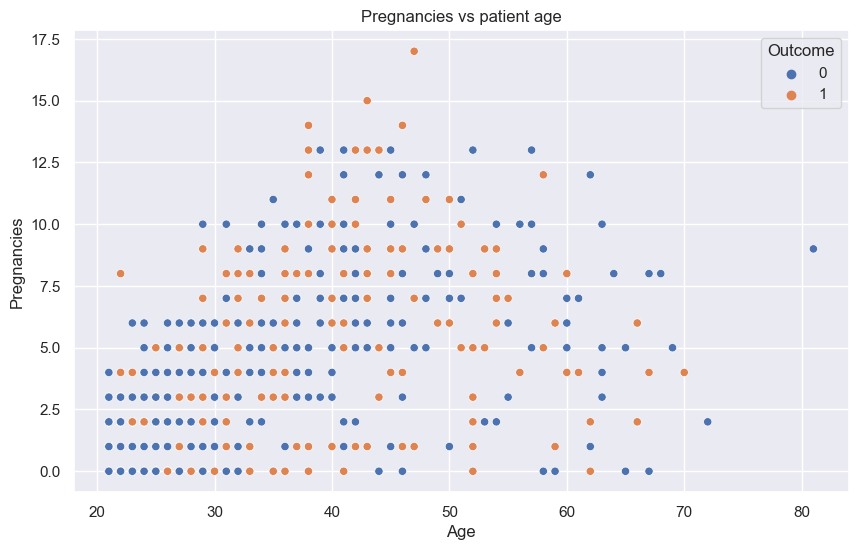

In [133]:
sns.scatterplot(data=diabetes_df,
           x='Age',
           y='Pregnancies',
            hue='Outcome').set(title='Pregnancies vs patient age')

In [134]:
diabetes_df['Pregnancies'].corr(diabetes_df['Age'])

0.5476611723154912

There is a correlation between age and pregnancies, but it is not as strong as expected.

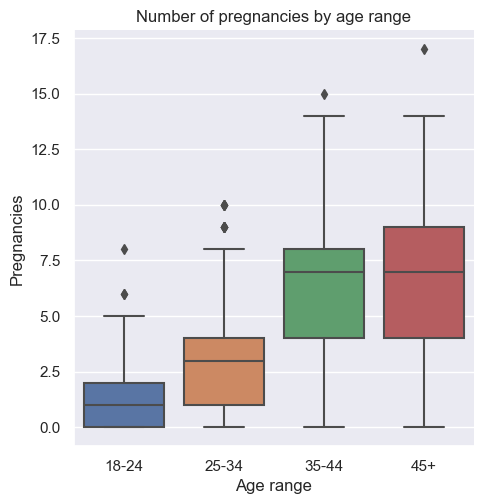

In [126]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='Age_range',
            y='Pregnancies').set(title='Number of pregnancies by age range',
                                xlabel='Age range')
#plt.savefig('fig16.png', dpi=300, bbox_inches='tight')

The box plot shows the number of pregnancies increasing as the age range increases. However, the boxes for the 35-44 group and the 45+ group are very similar. This suggests that most pregnancies occur before 45 years old. How does the chart look with the last group excluded?

In [128]:
younger_groups = ['18-24', '25-34', '35-44']
younger_df = diabetes_df[diabetes_df['Age_range'].isin(younger_groups)]

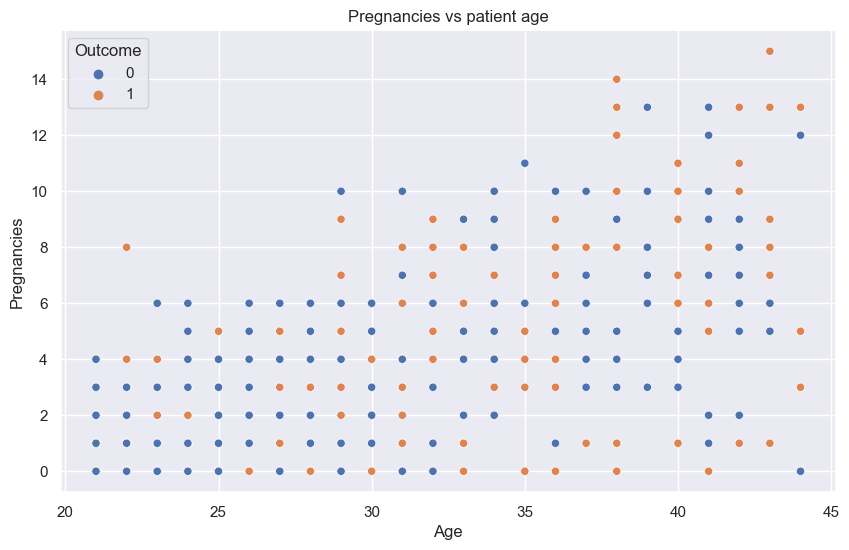

In [129]:
sns.scatterplot(data=younger_df,
           x='Age',
           y='Pregnancies',
        hue='Outcome').set(title='Pregnancies vs patient age')
#plt.savefig('fig17.png', dpi=300, bbox_inches='tight')

In [138]:
younger_df['Age'].corr(younger_df['Pregnancies'])

0.6541499248537654

The correlation is now stronger, but it still is not very strong. Age and plasma glucose are the two biggest risk factors for diabetes. How do they compare?
### Age and glucose

[Text(0.5, 1.0, 'Chance of diabetes based on age range and glucose levels'),
 Text(0.5, 33.249999999999986, 'Age range'),
 Text(92.25, 0.5, 'Glucose level')]

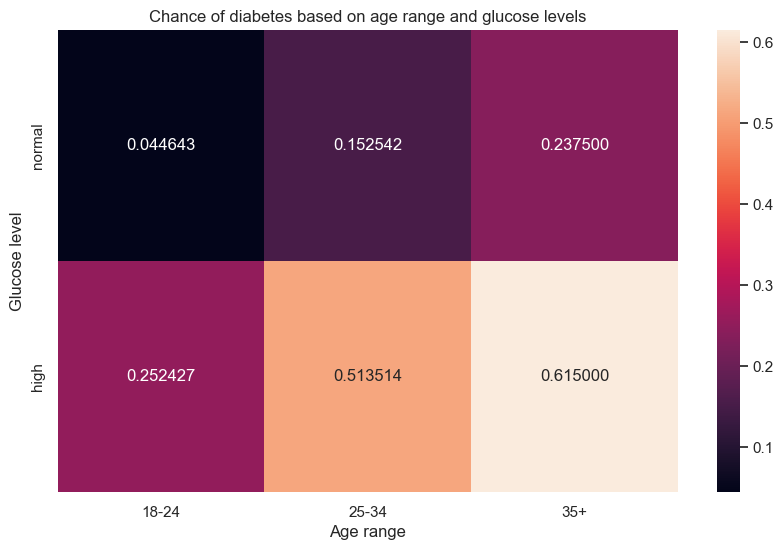

In [139]:
age_glucose_mean = pd.pivot_table(diabetes_df, index='Glucose_cat',
                                  columns='Age_range_new',
                                values='Outcome',
                                  aggfunc='mean')
sns.heatmap(age_glucose_mean, annot=True, fmt='2f').set(title='Chance of diabetes based on age range and glucose levels',
                                                     xlabel='Age range',
                                                       ylabel='Glucose level')

Diabetes is most common in the 35 and over age group with high glucose levels (61.5%, 1.75 times risk). As seen earlier, none of the patients with low glucose levels had diabetes. Age appears to have a bigger influence than glucose levels.

### Other correlations
Check for other correlations in the dataset

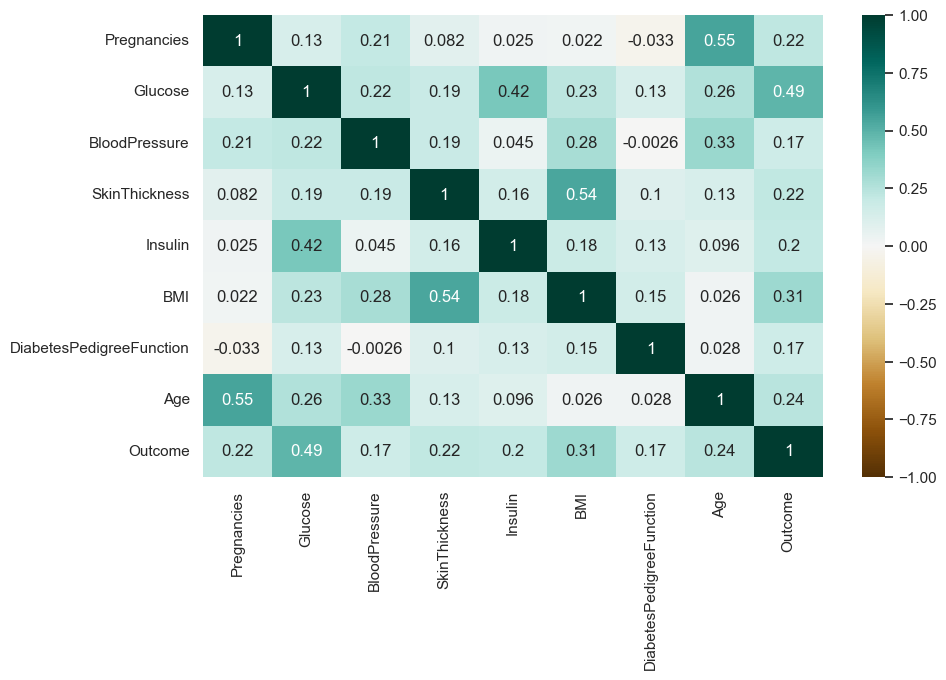

In [130]:
sns.heatmap(diabetes_df.corr(numeric_only=True), annot=True, center=0, cmap='BrBG', vmin=-1, vmax=1)
#plt.savefig('fig18.png', dpi=300, bbox_inches='tight')

The correlation between BMI and skin thickness is quite strong.

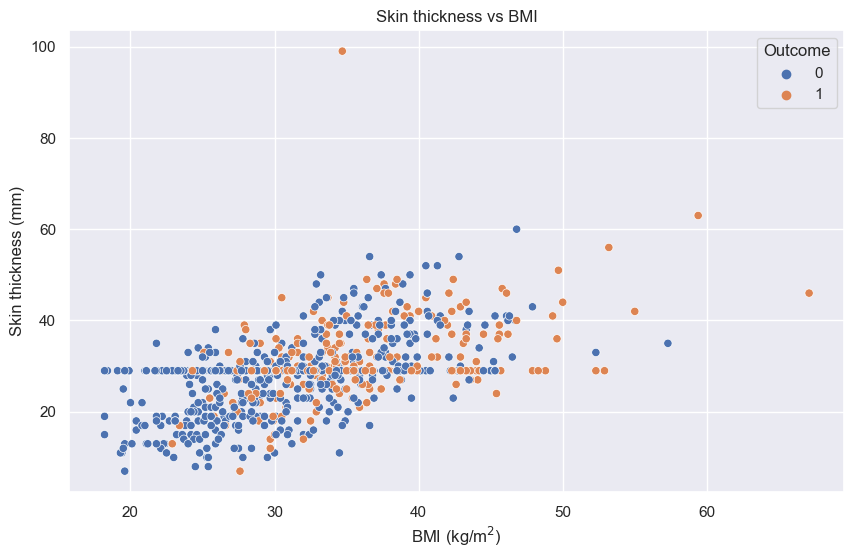

In [135]:
sns.scatterplot(data=diabetes_df,
           x='BMI',
           y='SkinThickness',
            hue='Outcome').set(title='Skin thickness vs BMI',
                              xlabel='BMI (kg/m$^2$)',
                              ylabel='Skin thickness (mm)')
plt.savefig('fig19.png', dpi=300, bbox_inches='tight')

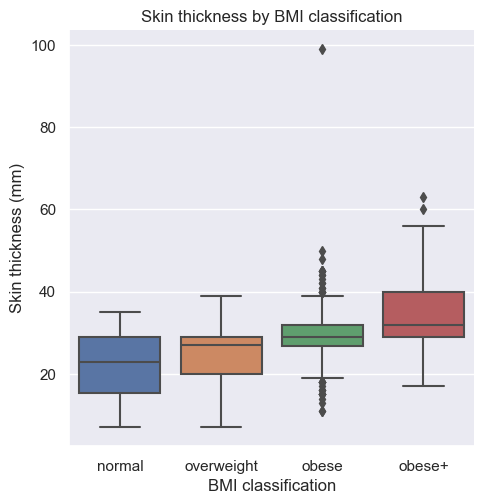

In [137]:
sns.catplot(kind='box',
            data=diabetes_df,
            x='BMI_classification',
            y='SkinThickness').set(title='Skin thickness by BMI classification',
                                   xlabel='BMI classification',
                                ylabel='Skin thickness (mm)')
plt.savefig('fig20.png', dpi=300, bbox_inches='tight')

[Text(0.5, 1.0, 'Insulin level vs plasma glucose')]

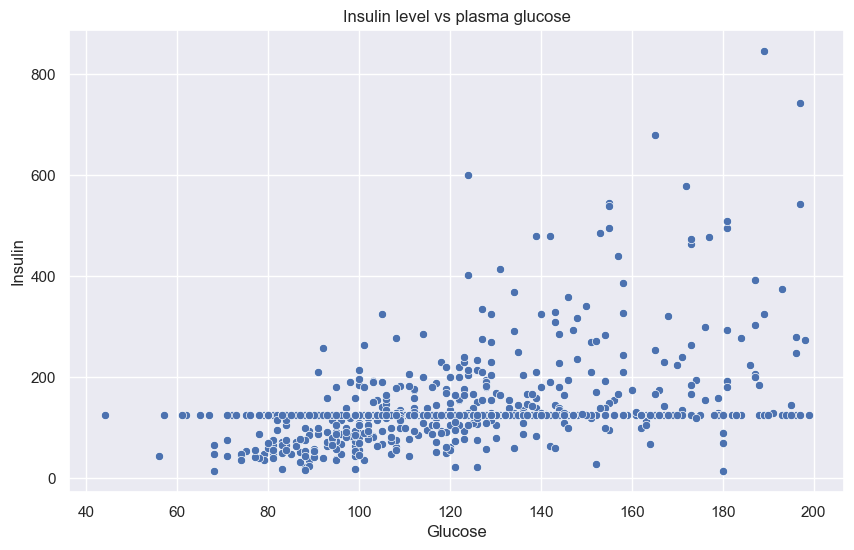

In [141]:
sns.scatterplot(data=diabetes_df,
           x='Glucose',
           y='Insulin').set(title='Insulin level vs plasma glucose')